<div class="alert alert-success">  
    <h1 align="center" style="color:darkcyan;">Google Smartphone Decimeter Challenge 2022</h1>  
</div>

<div>
    <h1 align="center" style="color:darkcyan;"><< One by One >></h1>
    <h1 align="center" style="color:darkcyan;">Coordinate with NearestNeighbors</h1>    
</div>

<div class="alert alert-success">  
</div>

#### - Usually when you "Ensemble" between the results of two or more notebooks, you specify coefficients that are multiplied in all rows. In this way, the results will probably get better in some rows, and at the same time, in some other rows, the results may get worse. However, if the results are generally better, we consider this "ensemble" successful.

#### - In any case, we should not forget that finding the coefficients for "Ensembling" with our eyes closed will probably make the results of some rows worse, but sometimes we do not realize this, because our overall score has improved anyway. 

#### - By the way, if the results of the notebooks are two or more dimensions, it will be really harder to choose the coefficients for "Ensembling", and only by guessing or a lot of trial and error, maybe it can be successful.

#### - In this notebook, we will share our innovative method for "Coordinate [One by One]" the results and you will see that for each row, we perform separate calculations and And we determine the order of proximity of all points in a row. Then we can use the point that has the highest score in this row as the main basis and, for example, combine the value of this point with the point closest to itself (Blend or Snap).

#### - We use "NearestNeighbors" for each row, which makes the calculations a bit slow. Of course you can use other methods.

<img src="https://raw.githubusercontent.com/MehranKazeminia/fifa-worldcup-2018/master/dart101.png">

## **<span style="color:darkred;">Adolphe Quetelet (1796-1874):</span>**

#### Suppose in a match, shooters throw their arrows at a target. Then, for some reason, the point that marks the center of the target disappears. If the number of arrows is large enough, the actual position of the target can be regained.

<div class="alert alert-success">  
</div>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
!ls ../input/*

../input/gsdc223017:
submission.csv

../input/gsdc223027:
submission.csv

../input/gsdc223355:
Coordinate_1.png  submission.csv

../input/gsdc223402:
submission.csv

../input/gsdc224376:
submission.csv

../input/gsdc224581:
baseline_test.csv  submission.csv

../input/gsdc224823:
submission.csv

../input/gsdc224870:
submission.csv

../input/smartphone-decimeter-2022:
metadata  sample_submission.csv  test  train


# <span style="color:darkcyan;">Data-Sets</span>

#### To illustrate this, I used the results of my notebook and the results of five public notebooks. Thanks to everyone who published their great notebooks, especially:

##### @**saitodevel01**, @**robikscube**, @**dienhoa**, @**ravishah1**, @**taroz1461**, @**saurabhbagchi**

In [2]:
SAMPLE = pd.read_csv('../input/smartphone-decimeter-2022/sample_submission.csv')
display(SAMPLE)

,tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
0,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650832999,37.904611,-86.481078
1,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650833999,37.904611,-86.481078
2,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650834999,37.904611,-86.481078
3,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650835999,37.904611,-86.481078
4,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650836999,37.904611,-86.481078
...,...,...,...,...
66092,2022-04-25-US-OAK-2/GooglePixel4,1650927742650,37.904611,-86.481078
66093,2022-04-25-US-OAK-2/GooglePixel4,1650927743642,37.904611,-86.481078
66094,2022-04-25-US-OAK-2/GooglePixel4,1650927744651,37.904611,-86.481078
66095,2022-04-25-US-OAK-2/GooglePixel4,1650927745640,37.904611,-86.481078


In [3]:
path0 = '../input/gsdc224870/submission.csv' 
path1 = '../input/gsdc224823/submission.csv'
path2 = '../input/gsdc224581/submission.csv' 
path3 = '../input/gsdc224376/submission.csv' 
path4 = '../input/gsdc223355/submission.csv'
path5 = '../input/gsdc223017/submission.csv'

path  = [path0, path1, path2, path3, path4, path5]

<div class="alert alert-success">  
</div>

# <span style="color:darkcyan;">Coordinate - One by One</span>

In [4]:
QT = [[], [], [], [], [], []]
QN = [[], [], [], [], [], []]

for k in range(len(path)):    
    sub_k = pd.read_csv(path[k]).values  
    PT = []
    PN = []    
    for j in range(len(SAMPLE)):
        PT.append([sub_k[j][2]])     
        PN.append([sub_k[j][3]])   
    QT[k] = PT  
    QN[k] = PN  

In [5]:
def near_plt(points, best_score, support, best_1, generated):
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(10, 10), facecolor='lightblue')
    plt.title(f'\nC O O R D I N A T E\n\n{SAMPLE.iloc[i][:2]}')   
    
    plt.scatter(points[0], points[1], s=200, facecolor='lightblue', edgecolor='black', label='All Points')
    plt.scatter(best_score[0], best_score[1], s=200, facecolor='violet', edgecolor='black', label='Best Score')
    plt.scatter(support[0], support[1], s=200, facecolor='yellow', edgecolor='black', label='Support')    
    plt.scatter(generated[0], generated[1], s=150, marker='x', label='Generated')
    plt.scatter(best_1[0], best_1[1], s=150, marker='x', label='Best-1 (To Check)')
   
    plt.legend(fontsize=12)
    plt.xlabel('LatitudeDegrees', fontsize=12)
    plt.ylabel('LongitudeDegrees', fontsize=12)
    plt.savefig(f'Coordinate_{i}.png')
    plt.show()

## **<span style="color:darkred;">Note:</span>**

#### - You can compare the results of your notebook with many other notebooks. You can even use one or two or ... the nearest points. Then "Coordinate" each row of your results. Also, easily try different coefficients.

#### - If the red cross (Best-1) is on the yellow circle, it means that the point closest to Best_Score is the point that scores exactly after Best_Score. But if the red cross (Best-1) is on the blue circle, that is, in this row, a point with a lower score is closer to the Best_Score point. Of course, we did not know about it before, but now we can use the same point to combine the results of this.

#### - In order to be more accurate, in version 9, I made some changes in the calculations. I have done calculations for LatitudeDegrees and LongitudeDegrees columns separately. In addition, (as I explained earlier) individual rows are also calculated separately. For this reason, the execution time has been almost doubled.




Row >>>>> 989
tripId            2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra
UnixTimeMillis                                1619651822000
Name: 989, dtype: object


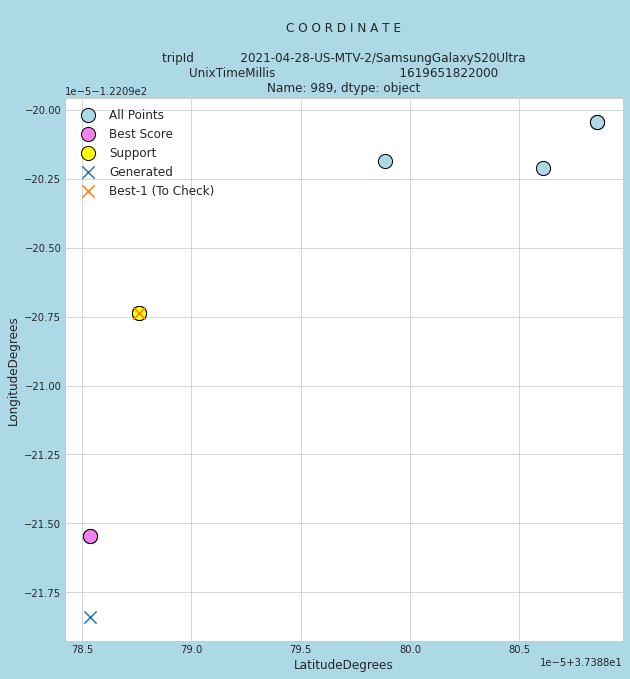




Row >>>>> 4370
tripId            2021-08-12-US-MTV-1/GooglePixel4
UnixTimeMillis                       1628800837434
Name: 4370, dtype: object


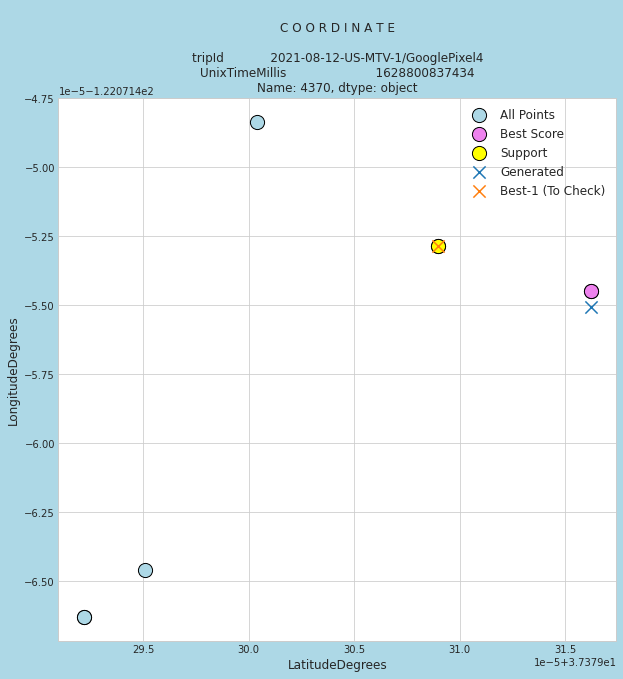




Row >>>>> 7652
tripId            2021-08-24-US-SVL-2/GooglePixel5
UnixTimeMillis                       1629842811441
Name: 7652, dtype: object


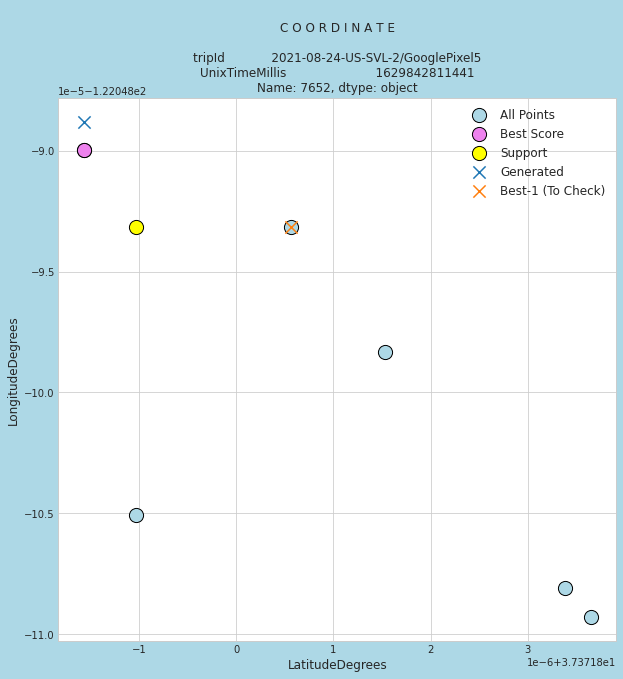




Row >>>>> 21734
tripId            2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra
UnixTimeMillis                                1641335791000
Name: 21734, dtype: object


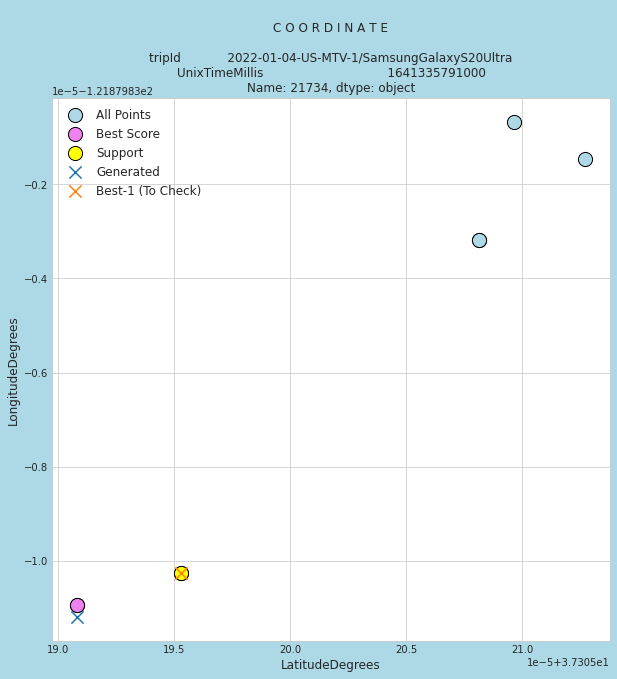




Row >>>>> 23414
tripId            2022-01-18-US-SJC-2/GooglePixel5
UnixTimeMillis                       1642533904438
Name: 23414, dtype: object


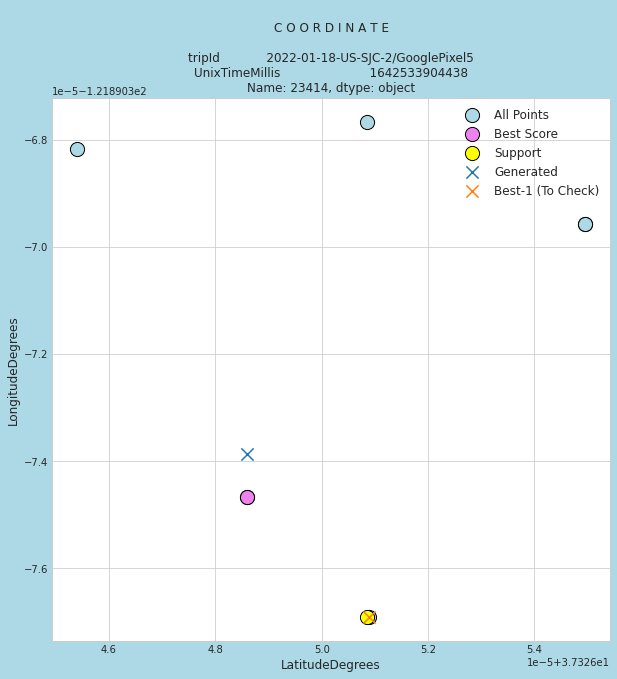




Row >>>>> 32118
tripId            2022-02-23-US-LAX-1/GooglePixel5
UnixTimeMillis                       1645630591433
Name: 32118, dtype: object


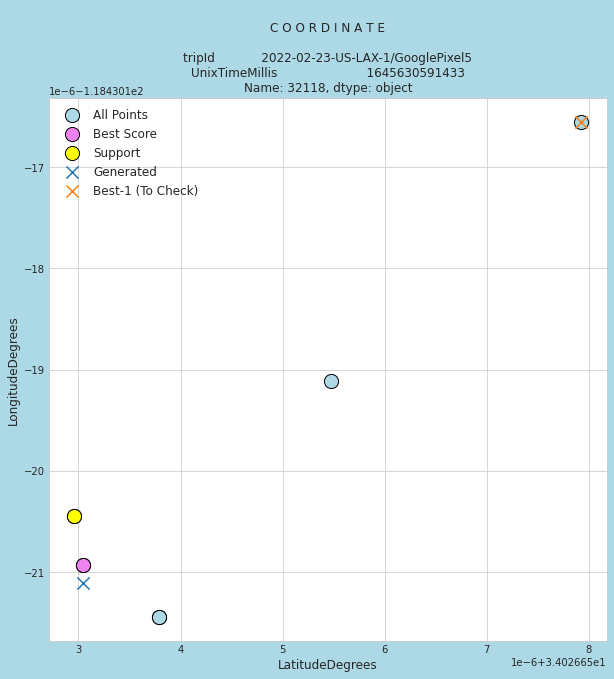




Row >>>>> 37597
tripId            2022-02-23-US-LAX-5/XiaomiMi8
UnixTimeMillis                    1645640378000
Name: 37597, dtype: object


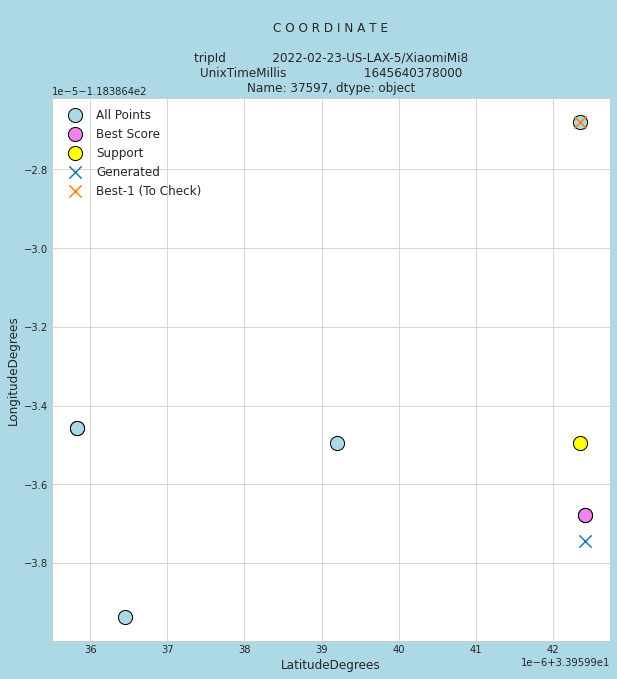




Row >>>>> 42751
tripId            2022-02-24-US-LAX-3/XiaomiMi8
UnixTimeMillis                    1645728513999
Name: 42751, dtype: object


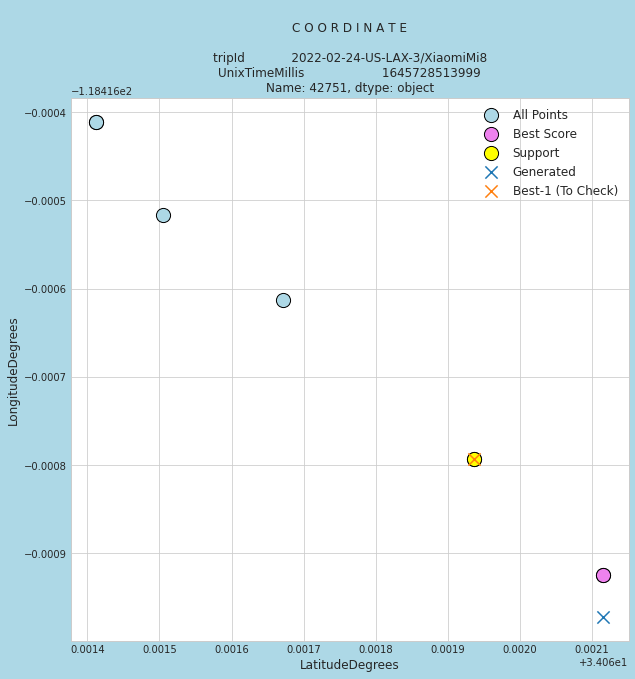




Row >>>>> 58029
tripId            2022-04-01-US-LAX-1/SamsungGalaxyS20Ultra
UnixTimeMillis                                1648830650999
Name: 58029, dtype: object


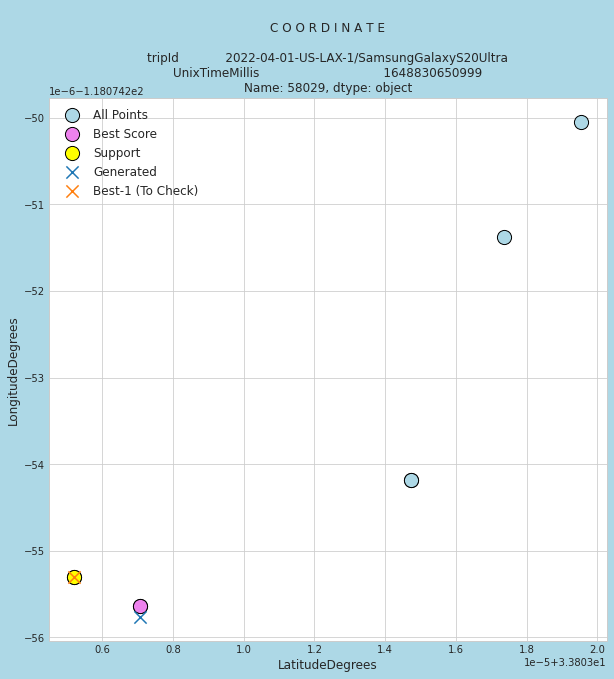




Row >>>>> 61646
tripId            2022-04-22-US-OAK-2/XiaomiMi8
UnixTimeMillis                    1650658701999
Name: 61646, dtype: object


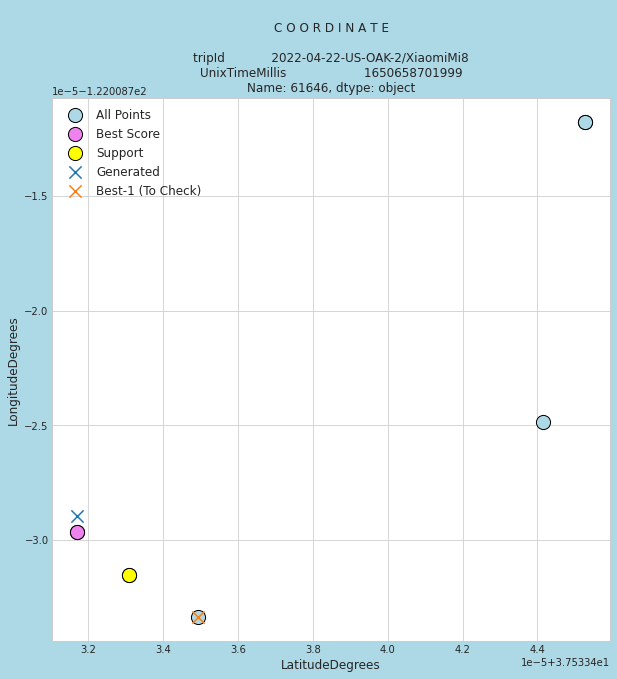

In [6]:
from sklearn.neighbors import NearestNeighbors
random_examples = np.random.randint(len(SAMPLE), size=10) # Number of examples: 10

T = [] # LatitudeDegrees
N = [] # LongitudeDegrees

for i in range(len(SAMPLE)): 
    XT = [QT[0][i], QT[1][i], QT[2][i], QT[3][i], QT[4][i], QT[5][i]]
    XN = [QN[0][i], QN[1][i], QN[2][i], QN[3][i], QN[4][i], QN[5][i]]
    
    nbrs = NearestNeighbors(n_neighbors=len(XT), algorithm='ball_tree').fit(XT)    
    _ , indices_T = nbrs.kneighbors(XT)
    
    nbrs = NearestNeighbors(n_neighbors=len(XN), algorithm='ball_tree').fit(XN)    
    _ , indices_N = nbrs.kneighbors(XN)
 
    tt = (1.00 * XT[indices_T[-1][0]][0]) + (-0.00 * XT[indices_T[-1][1]][0]) + (0.00 * XT[indices_T[-1][2]][0])
    T.append(tt) 
    
    nn = (1.36 * XN[indices_N[-1][0]][0]) + (-0.36 * XN[indices_N[-1][1]][0]) + (0.00 * XN[indices_N[-1][2]][0])    
    N.append(nn) 
    
    if i in random_examples:
        print(f'\n\n\nRow >>>>> {i}\n{SAMPLE.iloc[i][:2]}')
        near_plt([XT, XN], [XT[indices_T[-1][0]], XN[indices_N[-1][0]]],
                 [XT[indices_T[-1][1]], XN[indices_N[-1][1]]], [XT[-2], XN[-2]], [tt, nn])


In [7]:
sub = SAMPLE.copy()
sub['LatitudeDegrees']  = T
sub['LongitudeDegrees'] = N
sub

,tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
0,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650832999,37.395762,-122.102970
1,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650833999,37.395761,-122.102966
2,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650834999,37.395761,-122.102963
3,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650835999,37.395760,-122.102969
4,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650836999,37.395759,-122.102954
...,...,...,...,...
66092,2022-04-25-US-OAK-2/GooglePixel4,1650927742650,37.656969,-121.899007
66093,2022-04-25-US-OAK-2/GooglePixel4,1650927743642,37.656972,-121.899027
66094,2022-04-25-US-OAK-2/GooglePixel4,1650927744651,37.656968,-121.899002
66095,2022-04-25-US-OAK-2/GooglePixel4,1650927745640,37.656968,-121.899031


In [8]:
sub.to_csv("submission.csv", index=False)
!ls

Coordinate_21734.png  Coordinate_42751.png  Coordinate_7652.png
Coordinate_23414.png  Coordinate_4370.png   Coordinate_989.png
Coordinate_32118.png  Coordinate_58029.png  __notebook_source__.ipynb
Coordinate_37597.png  Coordinate_61646.png  submission.csv


<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>

# <span style="color:darkcyan;">Ensembling Vs. Coordinate[One by One] </span>

#### - If you want to "Ensembling", you can use the following function. Each time, the X coefficient can be different from the Y coefficient.

#### - This function is provided here so that you can use it for your further research as well as for comparison. You will see that; Its results are worse and it is not suitable for challenge submission.

In [9]:
def ensembling(main, support, coeff1, coeff2): 
    
    suba  = main.copy() 
    subav = suba.values
       
    subb  = support.copy()
    subbv = subb.values    
           
    ense  = main.copy()    
    ensev = ense.values  
 
    for i in range (len(main)):
        
        pera1 = subav[i, 2]
        pera2 = subav[i, 3]
        
        perb1 = subbv[i, 2]
        perb2 = subbv[i, 3]

        per1 = (pera1 * coeff1) + (perb1 * (1.0 - coeff1))
        per2 = (pera2 * coeff2) + (perb2 * (1.0 - coeff2))
        
        ensev[i, 2] = per1
        ensev[i, 3] = per2
        
    ense.iloc[:, 2:] = ensev[:, 2:]  
  
    return ense      

In [10]:
ensemble = ensembling(pd.read_csv(path5), pd.read_csv(path4), 0.50, 0.50)
ensemble

,tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
0,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650832999,37.395775,-122.102975
1,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650833999,37.395777,-122.102977
2,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650834999,37.395777,-122.102979
3,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650835999,37.395778,-122.102974
4,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650836999,37.395780,-122.102970
...,...,...,...,...
66092,2022-04-25-US-OAK-2/GooglePixel4,1650927742650,37.656966,-121.898998
66093,2022-04-25-US-OAK-2/GooglePixel4,1650927743642,37.656970,-121.899000
66094,2022-04-25-US-OAK-2/GooglePixel4,1650927744651,37.656965,-121.898979
66095,2022-04-25-US-OAK-2/GooglePixel4,1650927745640,37.656968,-121.898972


In [11]:
#ensemble.to_csv("ensembling.csv", index=False)
#!ls

<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>

## **<span style="color:darkred;">A question was raised in the comments, which may be your question as well:</span>**

#### Thanks to: @watanabetakahiro

#### What is best_score, supprt and best_1 ? I think best_score is the submission with the best score in LB. Support is the submission closest to the latitude and longitude of best_score. I don't know best_1.

---

- best_score: best submitted score (LB)
- best_1: The best submitted score, of course after best_score
- Support: The closest submission to best_score, which can be exactly the same as best_1 in some rows, but in some other rows, Support is a different submission.


I say in this notebook;

Always and in all rows, Support and best_1 are not exactly the same and can be different. So it's better to forget best_1 and do whatever you want, use Support.

Of course, we don't know that best_score is the best in the same rows. But if we accept this assumption, Support is definitely better than best_1.

<div class="alert alert-success">  
</div>

<div class="alert alert-success">
    <h1 align="center" style="color:darkcyan;">Good Luck.</h1> 
</div>